<a href="https://colab.research.google.com/github/proteinovayas13/My_works/blob/main/A_B_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as st
from scipy.stats import probplot
from scipy.stats import anderson, shapiro

warnings.simplefilter("ignore")

1. Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает.

Отвергается ли на уровне значимости 0.05 нулевая гипотеза?

In [ ]:
mu_0 = 525
x_mean = 541.4
n = 100
sigma = 100

stats = np.sqrt(n) * (x_mean - mu_0) / sigma
p_value = st.norm.pdf(stats)

print(f"p_value = {round(p_value, 4)}")

p_value = 0.104


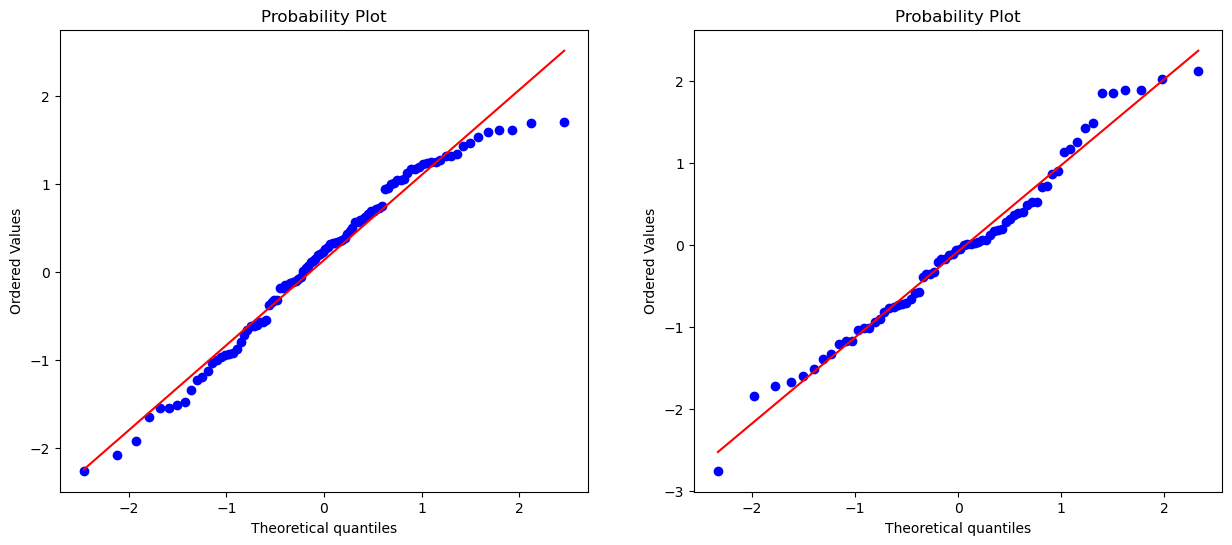

In [ ]:
x_1 = np.random.randn(100)
x_2 = np.random.randn(70)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

probplot(x=x_1, plot=axes[0])
probplot(x=x_2, plot=axes[1])
plt.show()

Нулевая гипотеза отвергается.

2. Размеры выборки для каждой версии баннера составляют по 1000 показов.
Базовый уровень конверсии составляет 10%.
Желаемый прирост конверсии составляет 2% (ожидаемая конверсия новой версии баннера 12%).
Необходимо проверить гипотезу о том, что новый дизайн баннера не позволяет увеличить конверсию.
Уровень значимости α — 0.05.
Мощность теста 𝛽 — 0.80.
Провести двухсторонний z-тест для проверки гипотезы

In [ ]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)

    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2
    P = float(p1*n1 + p2*n2) / (n1 + n2)

    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def two_sampled_independent_samples(stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")

    if alternative == 'two-sided':
        return 2 * (1 - st.norm.cdf(np.abs(stat)))

    if alternative == 'less':
        return st.norm.cdf(stat)

    if alternative == 'greater':
        return 1 - st.norm.cdf(stat)

In [ ]:
n = 1000  # Размер выборки для каждой группы
p1 = 0.10  # Базовый уровень конверсии
p2 = 0.12  # Ожидаемая конверсия новой версии баннера
alpha = 0.05  # Уровень значимости
beta = 0.80  # Мощность теста

x_1 = np.random.randint(0, 2, size=n)
x_2 = np.random.randint(0, 2, size=n)

stat = proportions_diff_z_stat_ind(x_1, x_2)
p_value = two_sampled_independent_samples(stat)
print(f"p_value = {round(p_value, 4)}")

p_value = 0.1281


In [ ]:
np.mean(x_1), np.mean(x_2)

(0.523, 0.495)

Гипотеза подтверждается.

3. Теперь предположим, что мы выбрали группу лояльных пользователей, сначала им показывали первую (старую) версию дизайна баннера, а затем показывали вторую (новую) версию дизайна баннера. После каждого показа, пользователи имеют возможность поставить лайк каждой версии баннера. Требуется проверить гипотезу о том, что доля лайков для старой и новой версии баннеров совпадает.

Отвергается ли на уровне значимости 0.05 нулевая гипотеза?

In [ ]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)

    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])

    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [ ]:
x_1 = np.random.randint(0, 2, size=1000)
x_2 = np.random.randint(0, 2, size=1000)

In [ ]:
stat = proportions_diff_z_stat_rel(x_1, x_2)
p_value = two_sampled_independent_samples(stat)

print(f"p_value = {round(p_value, 4)}")

p_value = 0.4121


In [ ]:
np.mean(x_1), np.mean(x_2)

(0.484, 0.465)

Нулевая гипотеза отвергается.